<h2 align="center">Automatic Machine Learning with H2O AutoML</h2>

 Importing Packages

In [1]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!pip install xlrd

     |████████████████████████████████| 103 kB 2.7 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [18]:
!pip install h2o automl

     |████████████████████████████████| 129.4 MB 147 kB/s  eta 0:00:01    |████████████████▉               | 68.1 MB 13.3 MB/s eta 0:00:05
     |████████████████████████████████| 71 kB 365 kB/s eta 0:00:011
     |████████████████████████████████| 219 kB 16.7 MB/s eta 0:00:01
     |████████████████████████████████| 150 kB 14.2 MB/s eta 0:00:01
     |████████████████████████████████| 608 kB 26.8 MB/s eta 0:00:01
     |████████████████████████████████| 10.2 MB 723 kB/s eta 0:00:01
     |████████████████████████████████| 106 kB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 128 kB 28.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.4 MB 19.5 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 5.1 MB/s eta 0:00:01
  Created wheel for h2o: filename=h2o-3.30.1.3-py2.py3-none-any.whl size=129446676 sha256=1d60fd1b50081c5f93f0eeaf1e222c8d7dfc0ba9568a485c7ffe15700c773b40
  Stored in directory: /Users/priyarajpurohit/Library/Caches/pip/wheels/c4/08/f0/1b00ab7

 Loading and Exploring the Data

In [4]:
xls=pd.ExcelFile('bank_term_deposit_marketing_analysis.xlsx')

In [5]:
xls.sheet_names

['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

In [8]:
client_info=pd.read_excel(xls,'CLIENT_INFO')
loan_history=pd.read_excel(xls,'LOAN_HISTORY')
marketing_history=pd.read_excel(xls,'MARKETING HISTORY')
subscription_history=pd.read_excel(xls,'SUBSCRIPTION HISTORY')

In [9]:
client_info.head()

,ID,AGE,JOB,MARITAL,EDUCATION
0,2836,58,management,married,tertiary
1,2837,44,technician,single,secondary
2,2838,33,entrepreneur,married,secondary
3,2839,47,blue-collar,married,unknown
4,2840,33,unknown,single,unknown


In [10]:
loan_history.head()

,ID,DEFAULT,BALANCE,HOUSING,LOAN
0,2836,no,2143,yes,no
1,2837,no,29,yes,no
2,2838,no,2,yes,yes
3,2839,no,1506,yes,no
4,2840,no,1,no,no


In [11]:
marketing_history.head()

,ID,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME
0,2836,unknown,5,may,261,1,-1,0,unknown
1,2837,unknown,5,may,151,1,-1,0,unknown
2,2838,unknown,5,may,76,1,-1,0,unknown
3,2839,unknown,5,may,92,1,-1,0,unknown
4,2840,unknown,5,may,198,1,-1,0,unknown


In [12]:
subscription_history.head()

,ID,TERM_DEPOSIT
0,2836,no
1,2837,no
2,2838,no
3,2839,no
4,2840,no


In [15]:
df=pd.merge(client_info,loan_history,on=['ID'])
df=pd.merge(df,marketing_history,on=['ID'])
df=pd.merge(df,subscription_history,on=['ID'])
df.head()

,ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,2836,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2837,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2838,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,2839,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,2840,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [16]:
df=df.drop(['ID'],axis=1)

Data Prep & Start H2O

In [19]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "12.0.2" 2019-07-16; OpenJDK Runtime Environment (build 12.0.2+10); OpenJDK 64-Bit Server VM (build 12.0.2+10, mixed mode, sharing)
  Starting server from /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/f1/l6_wf5vx0_d5ppn84ynb1f0w0000gn/T/tmp8by74dlg
  JVM stdout: /var/folders/f1/l6_wf5vx0_d5ppn84ynb1f0w0000gn/T/tmp8by74dlg/h2o_priyarajpurohit_started_from_python.out
  JVM stderr: /var/folders/f1/l6_wf5vx0_d5ppn84ynb1f0w0000gn/T/tmp8by74dlg/h2o_priyarajpurohit_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,15 days
H2O_cluster_name:,H2O_from_python_priyarajpurohit_ei944j
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [20]:
h2o_df=h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [21]:
h2o_df.describe()

Rows:45211
Cols:17




,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432807,,,,,1362.2720576850802,,,,15.806418791886923,,258.16307978146915,2.7638406582468997,40.19782796222158,0.5803233726305561,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.618762040975398,,,,,3044.7658291685216,,,,8.32247615304459,,257.52781226517124,3.0980208832791805,100.12874599059822,2.303441044931215,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [22]:
train,test=h2o_df.split_frame(ratios=[.75])
x=train.columns
y='TERM_DEPOSIT'
x.remove(y)

 Run H2O AutoML

In [23]:
from h2o.automl import H2OAutoML


In [26]:
aml=H2OAutoML(max_runtime_secs=600,
              balance_classes=True,
              stopping_metric='logloss',
              seed=1,
              project_name='Final')
%time aml.train(x=x,y=y,training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 46.6 s, sys: 1.5 s, total: 48.1 s
Wall time: 9min 51s


 AutoML Leaderboard and Ensemble Exploration

In [27]:
lb=aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20201013_173552,0.933738,0.220674,0.624391,0.1793,0.256699,0.0658942
GBM_grid__1_AutoML_20201013_173552_model_3,0.933043,0.201626,0.618828,0.1753,0.252442,0.0637269
XGBoost_grid__1_AutoML_20201013_173552_model_5,0.932403,0.200809,0.6164,0.17442,0.251288,0.0631456
XGBoost_grid__1_AutoML_20201013_173552_model_2,0.932192,0.202091,0.613752,0.17591,0.252224,0.063617
GBM_grid__1_AutoML_20201013_173552_model_7,0.932014,0.201077,0.617736,0.174642,0.251797,0.0634017
GBM_5_AutoML_20201013_173552,0.931863,0.207158,0.615063,0.167504,0.255999,0.0655357
GBM_2_AutoML_20201013_173552,0.93141,0.205349,0.618665,0.185453,0.254357,0.0646975
XGBoost_3_AutoML_20201013_173552,0.931299,0.202961,0.615707,0.177879,0.252595,0.0638045
GBM_3_AutoML_20201013_173552,0.93068,0.209813,0.613393,0.181549,0.25688,0.0659875
StackedEnsemble_AllModels_AutoML_20201013_173552,0.930302,0.215194,0.622983,0.175523,0.255156,0.0651047


In [44]:
se=aml.leader
meta=h2o.get_model(se.metalearner()['name'])

In [45]:
#metalearner=h2o.get_model(se.metalearner)
meta.varimp()

[('XGBoost_grid__1_AutoML_20201013_173552_model_5',
  0.6888196080072508,
  1.0,
  0.4675272847564177),
 ('GBM_grid__1_AutoML_20201013_173552_model_3',
  0.5552803051626894,
  0.8061331279013827,
  0.37688923243993144),
 ('DeepLearning_1_AutoML_20201013_173552',
  0.22922502521547744,
  0.33277947165096455,
  0.15558348280365072),
 ('XRT_1_AutoML_20201013_173552', 0.0, 0.0, 0.0),
 ('DRF_1_AutoML_20201013_173552', 0.0, 0.0, 0.0),
 ('GLM_1_AutoML_20201013_173552', 0.0, 0.0, 0.0)]

 Base Learner XGBoost Model Exploration

In [46]:
model=h2o.get_model('XGBoost_grid__1_AutoML_20201013_173552_model_5')

In [47]:
model.model_performance(test)


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.06096410524724397
RMSE: 0.24690910320853698
LogLoss: 0.1929838003249837
Mean Per-Class Error: 0.12385782298184556
AUC: 0.9387507992006656
AUCPR: 0.6274863414898206
Gini: 0.8775015984013312

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2727145850658417: 


,,no,yes,Error,Rate
0,no,9252.0,851.0,0.0842,(851.0/10103.0)
1,yes,302.0,1030.0,0.2267,(302.0/1332.0)
2,Total,9554.0,1881.0,0.1008,(1153.0/11435.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.272715,0.641145,224.0
1,max f2,0.128936,0.744320,289.0
2,max f0point5,0.423892,0.617303,163.0
3,max accuracy,0.423892,0.910888,163.0
4,max precision,0.879938,0.876923,15.0
5,max recall,0.002310,1.000000,396.0
6,max specificity,0.958241,0.999802,0.0
7,max absolute_mcc,0.264377,0.596514,228.0
8,max min_per_class_accuracy,0.151323,0.870120,277.0
9,max mean_per_class_accuracy,0.102618,0.876142,302.0



Gains/Lift Table: Avg response rate: 11.65 %, avg score: 11.79 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010057,0.849632,7.017169,7.017169,0.817391,0.888139,0.817391,0.888139,0.070571,0.070571,601.716934,601.716934,0.068492
1,2,0.020026,0.786651,6.626890,6.822882,0.771930,0.816922,0.794760,0.852686,0.066066,0.136637,562.689005,582.288183,0.131985
2,3,0.030083,0.736929,5.524155,6.388714,0.643478,0.760435,0.744186,0.821847,0.055556,0.192192,452.415459,538.871430,0.183482
3,4,0.040052,0.695715,5.647918,6.204324,0.657895,0.715391,0.722707,0.795349,0.056306,0.248498,464.791765,520.432387,0.235928
4,5,0.050022,0.657350,5.120779,5.988373,0.596491,0.676265,0.697552,0.771615,0.051051,0.299550,412.077867,498.837255,0.282426
5,6,0.100044,0.471102,4.862739,5.425556,0.566434,0.561378,0.631993,0.666497,0.243243,0.542793,386.273861,442.555558,0.501122
6,7,0.150066,0.312949,3.722096,4.857736,0.433566,0.388184,0.565851,0.573726,0.186186,0.728979,272.209622,385.773580,0.655239
7,8,0.200000,0.179975,2.330384,4.226727,0.271454,0.243320,0.492348,0.491233,0.116366,0.845345,133.038424,322.672673,0.730429
8,9,0.300044,0.062729,1.065600,3.172711,0.124126,0.108914,0.369572,0.363756,0.106607,0.951952,6.560013,217.271075,0.737857
9,10,0.400000,0.027159,0.330475,2.462462,0.038495,0.041404,0.286839,0.283203,0.033033,0.984985,-66.952517,146.246246,0.662111


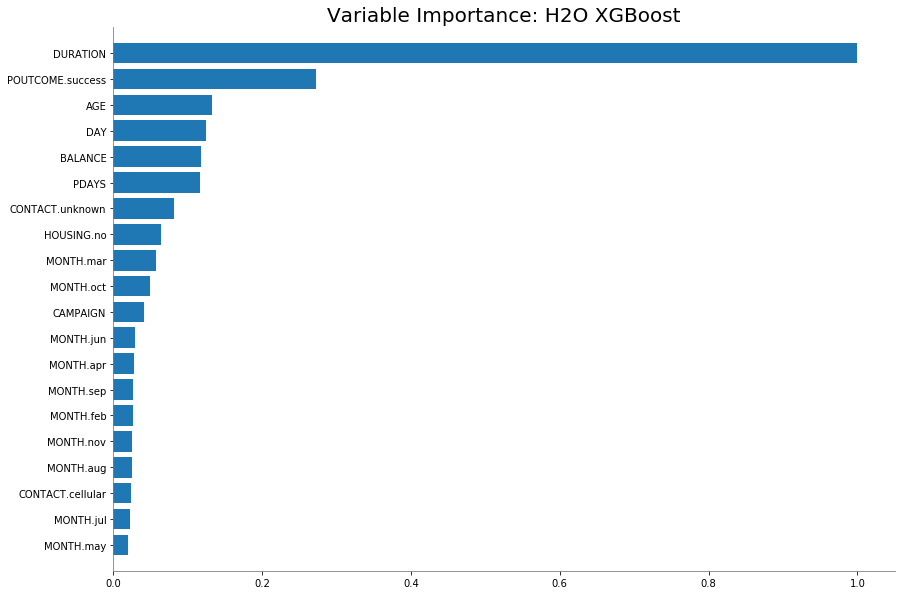

In [48]:
model.varimp_plot(num_of_features=20)